#### Programa para calculo de derivadas por diferencas finitas

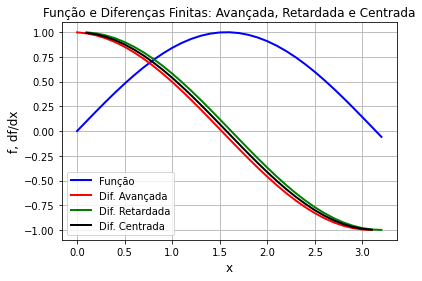

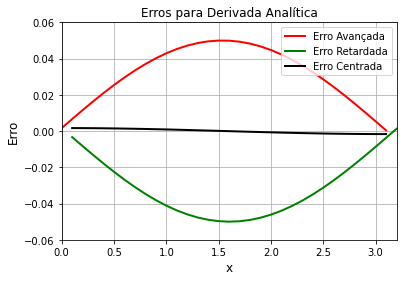

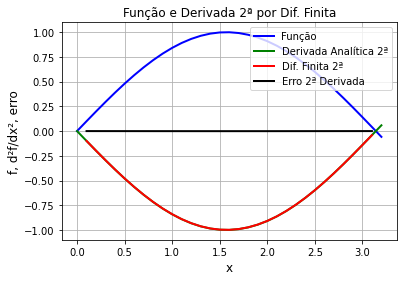

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros iniciais
dx = 0.1
x = np.arange(0, np.pi + dx, dx)
f = np.sin(x)
deranalit = np.cos(x)
deranalit2 = -np.sin(x)

jmax = len(x)
dfava = np.zeros(jmax)
dfret = np.zeros(jmax)
dfcen = np.zeros(jmax)
dfseg = np.zeros(jmax)

# Cálculo das derivadas por diferenças finitas
dfava[0:jmax-1] = (f[1:jmax] - f[0:jmax-1]) / dx
dfret[1:jmax] = (f[1:jmax] - f[0:jmax-1]) / dx
dfcen[1:jmax-1] = (f[2:jmax] - f[0:jmax-2]) / (2*dx)
dfseg[1:jmax-1] = (f[2:jmax] - 2*f[1:jmax-1] + f[0:jmax-2]) / dx**2

# Gráfico da função e das diferenças finitas
plt.figure(1)
plt.plot(x, f, 'b', linewidth=2, label='Função')
plt.grid(True)
plt.plot(x[0:jmax-1], dfava[0:jmax-1], 'r', linewidth=2, label='Dif. Avançada')
plt.plot(x[1:jmax], dfret[1:jmax], 'g', linewidth=2, label='Dif. Retardada')
plt.plot(x[1:jmax-1], dfcen[1:jmax-1], 'k', linewidth=2, label='Dif. Centrada')
#plt.axis([x[0], x[-1], -np.inf, np.inf])
plt.title('Função e Diferenças Finitas: Avançada, Retardada e Centrada', fontsize=12)
plt.ylabel('f, df/dx', fontsize=12)
plt.xlabel('x', fontsize=12)
plt.legend()

# Cálculo dos erros em relação à derivada analítica
difer1 = np.zeros(jmax)
difer2 = np.zeros(jmax)
difer3 = np.zeros(jmax)
difer2a = np.zeros(jmax)

difer1[0:jmax-1] = deranalit[0:jmax-1] - dfava[0:jmax-1]
difer2[1:jmax] = deranalit[1:jmax] - dfret[1:jmax]
difer3[1:jmax-1] = deranalit[1:jmax-1] - dfcen[1:jmax-1]
difer2a[1:jmax-1] = deranalit2[1:jmax-1] - dfseg[1:jmax-1]

# Gráfico dos erros
plt.figure(2)
plt.plot(x[0:jmax-1], difer1[0:jmax-1], 'r', linewidth=2, label='Erro Avançada')
plt.grid(True)
plt.plot(x[1:jmax], difer2[1:jmax], 'g', linewidth=2, label='Erro Retardada')
plt.plot(x[1:jmax-1], difer3[1:jmax-1], 'k', linewidth=2, label='Erro Centrada')
plt.axis([x[0], x[-1], -0.06, 0.06])
plt.title('Erros para Derivada Analítica', fontsize=12)
plt.ylabel('Erro', fontsize=12)
plt.xlabel('x', fontsize=12)
plt.legend()

# Estatísticas dos erros
estat_avanc = [np.mean(difer1), np.median(difer1), np.std(difer1), np.min(difer1), np.max(difer1)]
estat_retar = [np.mean(difer2), np.median(difer2), np.std(difer2), np.min(difer2), np.max(difer2)]
estat_centr = [np.mean(difer3), np.median(difer3), np.std(difer3), np.min(difer3), np.max(difer3)]

# Gráfico da segunda derivada e erro
plt.figure(3)
plt.plot(x, f, 'b', linewidth=2, label='Função')
plt.grid(True)
plt.plot(x, deranalit2, 'g', linewidth=2, label='Derivada Analítica 2ª')
plt.plot(x[1:jmax-1], dfseg[1:jmax-1], 'r', linewidth=2, label='Dif. Finita 2ª')
plt.plot(x[1:jmax-1], difer2a[1:jmax-1], 'k', linewidth=2, label='Erro 2ª Derivada')
plt.title('Função e Derivada 2ª por Dif. Finita', fontsize=12)
plt.ylabel('f, d²f/dx², erro', fontsize=12)
plt.xlabel('x', fontsize=12)
plt.legend()

# Estatísticas do erro da segunda derivada
estat_2der = [np.mean(difer2a), np.median(difer2a), np.std(difer2a), np.min(difer2a), np.max(difer2a)]

plt.show()